# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
import patsy
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Carrega o conjunto de dados "tips" usando a função load_dataset do Seaborn
df = sns.load_dataset("tips")

# Calcula a porcentagem da gorjeta em relação ao valor total da conta e adiciona uma nova coluna 'tip_pct' ao DataFrame
df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip'])

# Calcula o valor líquido da conta subtraindo a gorjeta do total da conta e adiciona uma nova coluna 'net_bill' ao DataFrame
df['net_bill'] = df['total_bill'] - df['tip']

# Exibe as cinco primeiras linhas do DataFrame modificado
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# Cria as matrizes de design 'y' e 'X' usando a fórmula fornecida
y, X = patsy.dmatrices("tip ~ sex + smoker + time + net_bill", df)

# Cria e ajusta o modelo de regressão linear usando OLS (Mínimos Quadrados Ordinários)
reg_tip = sm.OLS(y, X).fit()

# Exibe o resumo estatístico do modelo de regressão
reg_tip.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.64e-20
Time:                        20:03:46   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Cria as matrizes de design 'y' e 'X' usando a fórmula fornecida
y, X = patsy.dmatrices("tip ~ net_bill", df)

# Cria e ajusta o modelo de regressão linear usando OLS (Mínimos Quadrados Ordinários)
reg_tip = sm.OLS(y, X).fit()

# Exibe o resumo estatístico do modelo de regressão
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.02e-23
Time:                        20:04:32   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

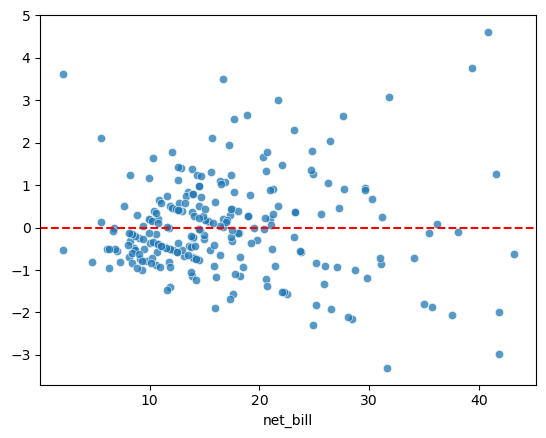

In [5]:
# Calcula os resíduos do modelo de regressão
res = reg_tip.resid

# Cria um gráfico de dispersão dos resíduos em função da variável 'net_bill'
sns.scatterplot(x='net_bill', y=res, data=df, alpha=0.75)

# Adiciona uma linha horizontal no eixo y no valor 0 para referência
plt.axhline(y=0, color='r', linestyle='--')

In [6]:
# Cria as matrizes de design 'y' (variável de resposta) e 'X' (variáveis explicativas) usando a transformação logarítmica em 'net_bill'
y, X = patsy.dmatrices("tip ~ np.log(net_bill)", df)

# Ajusta um modelo de regressão linear usando Ordinary Least Squares (OLS)
reg_tip_log = sm.OLS(y, X).fit()

# Exibe um resumo estatístico do modelo
reg_tip_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           4.40e-20
Time:                        20:06:06   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

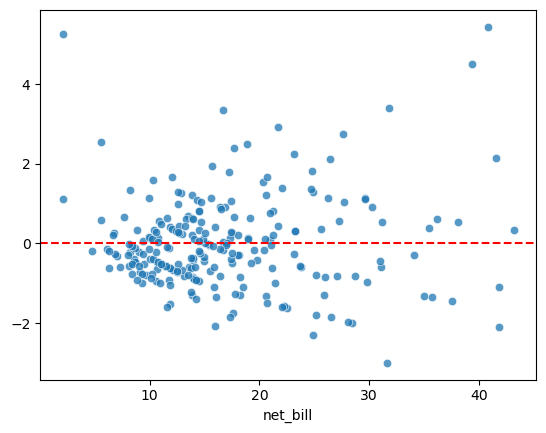

In [7]:
# Calcula os resíduos do modelo de regressão linear logarítmica
res_log = reg_tip_log.resid

# Cria um gráfico de dispersão dos resíduos em relação à variável 'net_bill'
sns.scatterplot(x='net_bill', y=res_log, data=df, alpha=0.75)

# Adiciona uma linha horizontal no eixo y indicando a posição zero (linha de referência)
plt.axhline(y=0, color='r', linestyle='--')

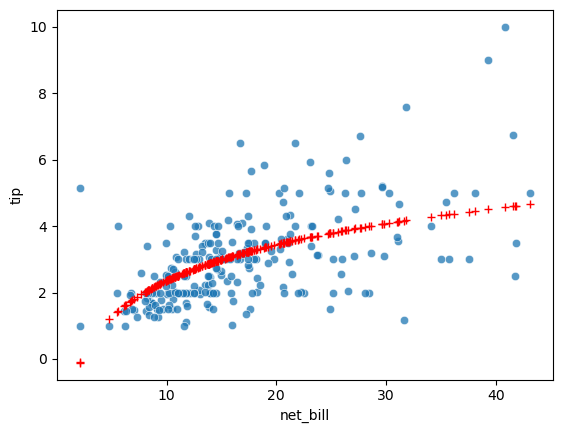

In [8]:
# Cria um gráfico de dispersão da variável 'tip' em relação à variável 'net_bill'
sns.scatterplot(x='net_bill', y='tip', data=df, alpha=0.75)

# Adiciona uma linha vermelha representando as previsões do modelo de regressão linear logarítmica
plt.plot(df['net_bill'], reg_tip_log.fittedvalues, 'r+')

In [9]:
# Cria matrizes de design para a regressão linear incluindo a variável 'net_bill' e sua potência de segunda ordem
y, X = patsy.dmatrices("tip ~ net_bill + np.power(net_bill, 2)", df)

# Realiza uma regressão linear utilizando as matrizes de design
reg_tip_power = sm.OLS(y, X).fit()

# Apresenta um resumo estatístico do modelo de regressão linear
reg_tip_power.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           4.96e-22
Time:                        20:07:50   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

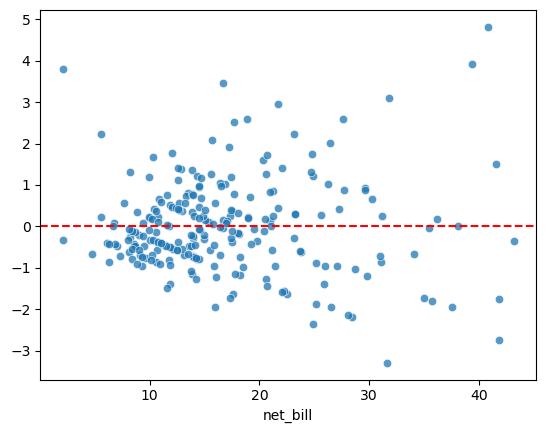

In [10]:
# Calcula os resíduos da regressão utilizando o modelo com a potência de segunda ordem
res_power = reg_tip_power.resid

# Gera um gráfico de dispersão dos resíduos em relação à variável 'net_bill'
sns.scatterplot(x='net_bill', y=res_power, data=df, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')  # Adiciona uma linha horizontal no zero para referência

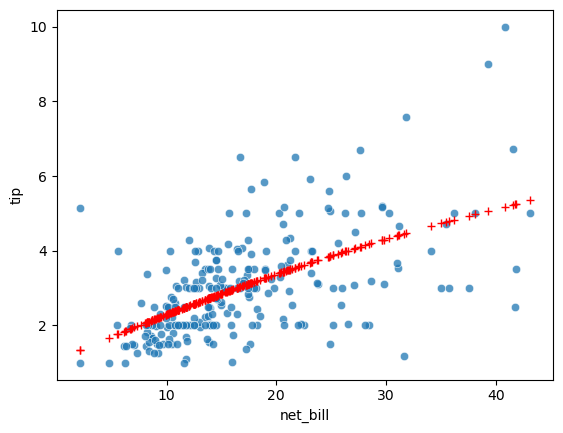

In [11]:
# Gera um gráfico de dispersão da variável 'tip' em relação à variável 'net_bill'
sns.scatterplot(x='net_bill', y='tip', data=df, alpha=0.75)

# Adiciona pontos vermelhos para representar os valores ajustados pelo modelo de regressão com potência de segunda ordem
plt.plot(df['net_bill'], reg_tip_power.fittedvalues, 'r+')

### Analise dos métodos: 

O modelo ideal a ser selecionado é aquele com o R² mais alto, que corresponde ao modelo polinomial. Visualmente, este também parece ser o modelo mais apropriado.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [12]:
# Criação das matrizes de design (y e X) usando a biblioteca patsy
y, X = patsy.dmatrices("np.log(tip) ~ sex + smoker + time + net_bill", df)

# Criação do modelo de regressão linear usando Ordinary Least Squares (OLS) da biblioteca statsmodels
reg_logy = sm.OLS(y, X).fit()

# Exibição das estatísticas e métricas da regressão usando o método summary()
reg_logy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.21e-18
Time:                        20:12:03   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Criação das matrizes de design (y e X) usando a biblioteca patsy
y, X = patsy.dmatrices("np.log(tip) ~ net_bill", df)

# Criação do modelo de regressão linear usando Ordinary Least Squares (OLS) da biblioteca statsmodels
reg_logy = sm.OLS(y, X).fit()

# Exibição das estatísticas e métricas da regressão usando o método summary()
reg_logy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.60e-21
Time:                        20:12:56   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

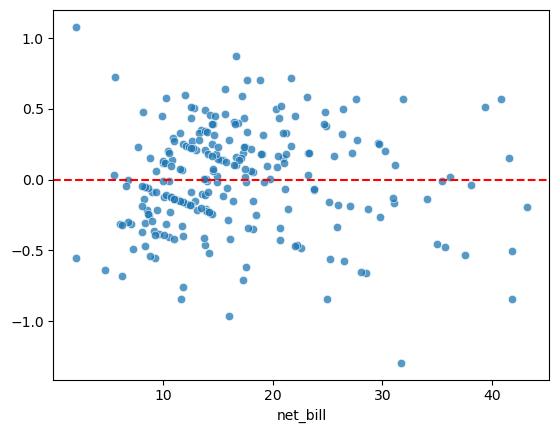

In [14]:
# Cálculo dos resíduos do modelo de regressão logarítmica
res = reg_logy.resid

# Plotagem do gráfico de dispersão dos resíduos em relação à variável 'net_bill'
sns.scatterplot(x='net_bill', y=res, data=df, alpha=0.75)

# Adição de uma linha horizontal no valor zero para facilitar a visualização dos resíduos
plt.axhline(y=0, color='r', linestyle='--')

In [15]:
# Criação das matrizes de design 'y' e 'X' usando a transformação logarítmica nas variáveis 'tip' e 'net_bill'
y, X = patsy.dmatrices("np.log(tip) ~ np.log(net_bill)", df)

# Ajuste do modelo de regressão linear usando a biblioteca statsmodels
reg_logy_logx = sm.OLS(y, X).fit()

# Exibição do resumo estatístico do modelo
reg_logy_logx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.62e-22
Time:                        20:14:26   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

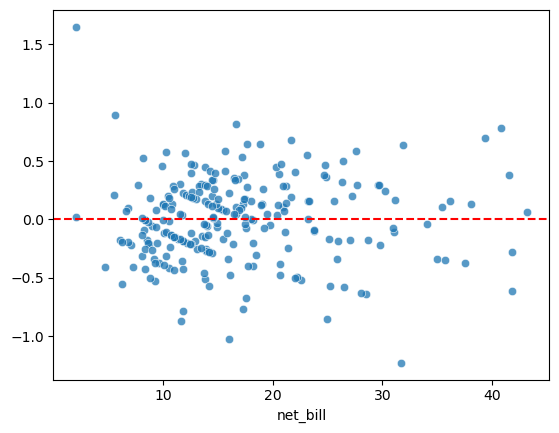

In [16]:
res_logx = reg_logy_logx.resid

sns.scatterplot(x = 'net_bill', y = res_logx, data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

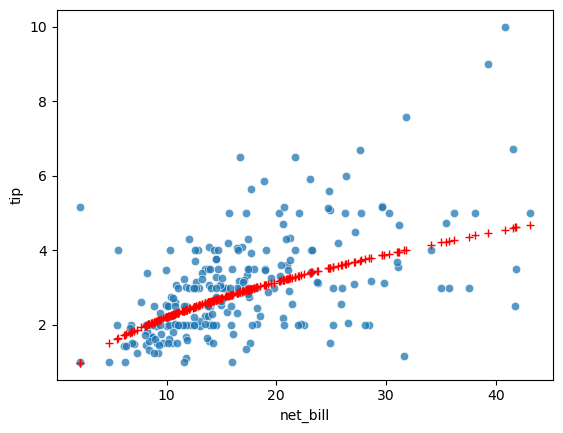

In [17]:
# Cálculo das previsões revertendo a transformação logarítmica
pred_y = np.exp(reg_logy_logx.fittedvalues)

# Gráfico de dispersão com as previsões sobre os dados originais
sns.scatterplot(x='net_bill', y='tip', data=df, alpha=0.75)
plt.plot(df['net_bill'], pred_y, 'r+')

In [18]:
# Criação das matrizes de design para a regressão logarítmica com termo quadrático
y, X = patsy.dmatrices("np.log(tip) ~ net_bill + np.power(net_bill, 2)", df)

# Ajuste do modelo de regressão linear
reg_logy_powerx = sm.OLS(y, X).fit()

# Impressão do resumo estatístico do modelo
reg_logy_powerx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.82e-22
Time:                        20:16:22   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

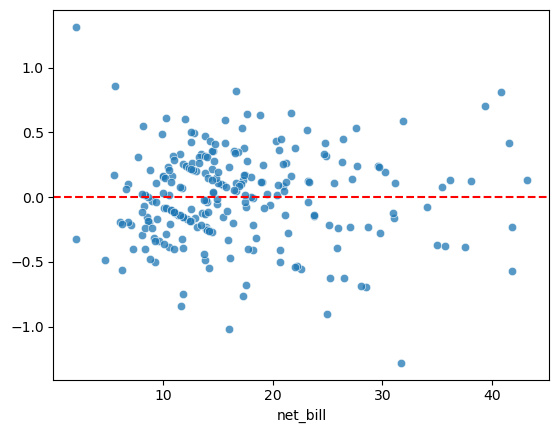

In [19]:
# Resíduos do modelo de regressão logarítmica com termo quadrático
res_powerx = reg_logy_powerx.resid

# Gráfico de dispersão dos resíduos em função de net_bill
sns.scatterplot(x='net_bill', y=res_powerx, data=df, alpha=0.75)

# Linha horizontal no eixo y = 0 para indicar o valor zero nos resíduos
plt.axhline(y=0, color='r', linestyle='--')

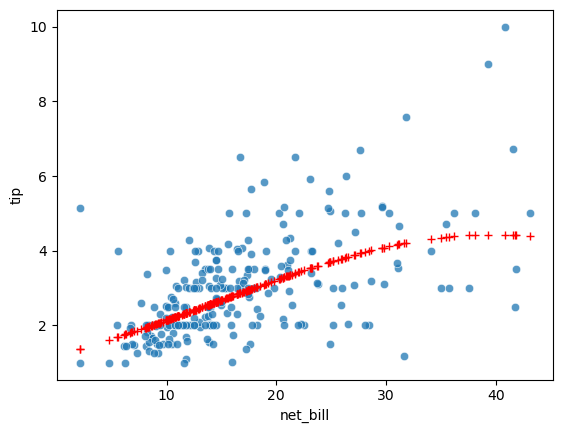

In [27]:
# Calcula as previsões revertendo a transformação logarítmica para obter os valores originais
pred_y = np.exp(reg_logy_powerx.fittedvalues)

# Cria um gráfico de dispersão dos dados originais com a variável 'net_bill' no eixo x e 'tip' no eixo y
sns.scatterplot(x='net_bill', y='tip', data=df, alpha=0.75)

# Adiciona uma linha vermelha (+) representando as previsões do modelo logarítmico com termo quadrático
plt.plot(df['net_bill'], pred_y, 'r+')

In [28]:
# Calcula as previsões revertendo a transformação logarítmica para obter os valores originais
y_pred_logx = np.exp(reg_logy_logx.fittedvalues)
y_pred_powerx = np.exp(reg_logy_powerx.fittedvalues)

# Extrai os valores observados da variável 'tip' do DataFrame original
y = df['tip']

# Cria um DataFrame contendo as observações reais e as previsões dos modelos logarítmicos
predictions = pd.DataFrame([y, y_pred_logx, y_pred_powerx]).T

# Nomeia as colunas do DataFrame para facilitar a interpretação
predictions.columns = ['y', 'y_pred_logx', 'y_pred_powerx']

# Exibe o DataFrame com as observações reais ('y') e as previsões dos dois modelos logarítmicos
predictions

,y,y_pred_logx,y_pred_powerx
0,1.01,2.810492,2.785403
1,1.66,2.052312,2.003340
2,3.50,2.946035,2.951580
3,3.31,3.184817,3.255417
4,3.61,3.233594,3.318374
...,...,...,...
239,5.92,3.398742,3.530894
240,2.00,3.552301,3.723699
241,2.00,3.208893,3.286480
242,1.75,2.818635,2.795212


In [29]:
# Calcula o coeficiente de determinação (R²) para o modelo com transformação logarítmica em 'net_bill'
r2_logx = predictions[['y', 'y_pred_logx']].corr().iloc[0, 1] ** 2

# Calcula o coeficiente de determinação (R²) para o modelo com termo quadrático em 'net_bill'
r2_powerx = predictions[['y', 'y_pred_powerx']].corr().iloc[0, 1] ** 2

# Imprime os valores de R² para os dois modelos
print('R² para modelo com logaritmo de X:', r2_logx)
print('R² para modelo com polinômio de X:', r2_powerx)

R² para modelo com logaritmo de X: 0.3283774385527559
R² para modelo com polinômio de X: 0.32908491114682054


### Analise dos métodos:

O coeficiente de determinação (R²) do modelo da primeira análise continua sendo superior, registrando um valor de 0.334.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [30]:
# Importa a biblioteca pandas com o alias 'pd'
import pandas as pd

# Lê um conjunto de dados a partir de um arquivo CSV chamado 'previsao_de_renda.csv' e armazena no DataFrame 'df'
df = pd.read_csv('previsao_de_renda.csv')

# Exibe a dimensão (número de linhas e colunas) do DataFrame 'df'
df.shape

(15000, 16)

<Axes: ylabel='renda'>

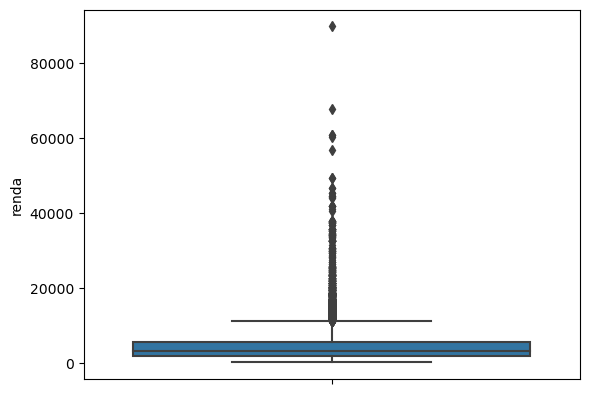

In [31]:
# Cria um boxplot usando o DataFrame 'df' para visualizar a distribuição da variável 'renda'
# A variável 'renda' é representada no eixo y
sns.boxplot(df, y='renda')


<Axes: ylabel='renda'>

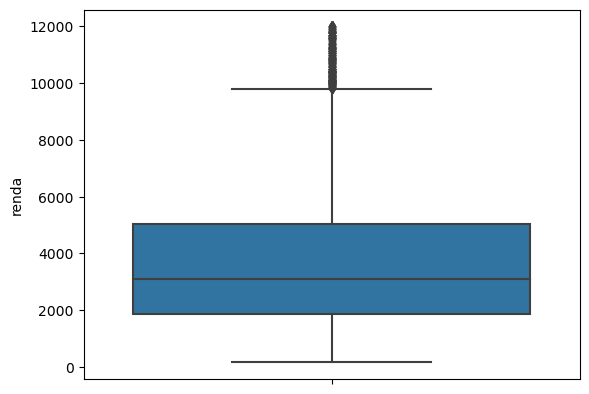

In [32]:
# Filtra o DataFrame 'df' removendo observações onde a variável 'renda' é maior ou igual a 12000
df = df[df['renda'] < 12000]

# Cria um novo boxplot após a remoção dos outliers, usando a variável 'renda' no eixo y
sns.boxplot(df, y='renda')

In [33]:
# Cria e ajusta um modelo de regressão linear usando a fórmula "renda ~ tempo_emprego" e o DataFrame 'df'
reg = smf.ols("renda ~ tempo_emprego", data=df).fit()

# Exibe o resumo estatístico do modelo de regressão
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1146.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          9.88e-240
Time:                        20:31:23   Log-Likelihood:            -1.0711e+05
No. Observations:               11635   AIC:                         2.142e+05
Df Residuals:                   11633   BIC:                         2.142e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2976.1832     34.588     86.046      0.000    2908.385    3043.982
tempo_emprego   123.6768      3.653     33.857      0.000     116.516     130.837
==============================================================================
Omnibus:                     1584.883   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2318.532
Skew:                           1.028   Prob(JB):                         0.00
Kurtosis:                       3.743   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

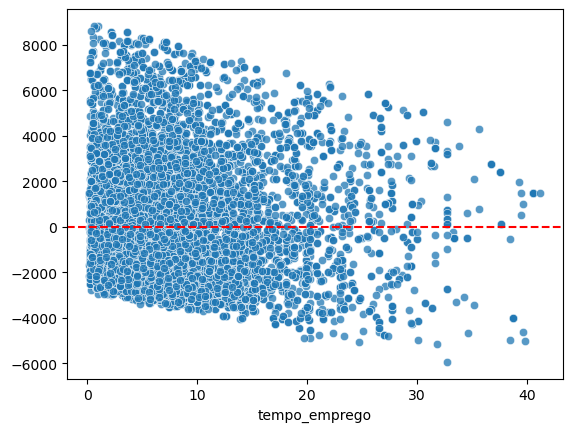

In [34]:
# Calcula os resíduos do modelo de regressão
res = reg.resid

# Cria um gráfico de dispersão dos resíduos em relação à variável 'tempo_emprego'
sns.scatterplot(x='tempo_emprego', y=res, data=df, alpha=0.75)

# Adiciona uma linha horizontal no eixo y no valor 0 para referência
plt.axhline(y=0, color='r', linestyle='--')

In [35]:
# Criação de um modelo de regressão linear incluindo a variável 'tempo_emprego' e sua potência de segunda ordem
reg_transform = smf.ols("renda ~ tempo_emprego + np.power(tempo_emprego, 2)", data=df).fit()

# Exibição do resumo estatístico do modelo
reg_transform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     573.4
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          3.30e-238
Time:                        20:34:28   Log-Likelihood:            -1.0711e+05
No. Observations:               11635   AIC:                         2.142e+05
Df Residuals:                   11632   BIC:                         2.143e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2997.7526     46.569     64.372      0.000    2906.469    3089.036
tempo_emprego                117.6439      9.456     12.442      0.000      99.109     136.178
np.power(tempo_emprego, 2)     0.2458      0.355      0.692      0.489      -0.451       0.942
==============================================================================
Omnibus:                     1587.176   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2323.367
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       3.745   Cond. No.                         393.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

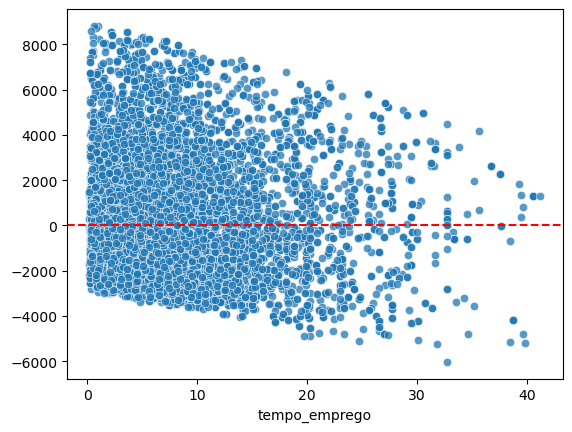

In [36]:
# Cálculo dos resíduos do modelo de regressão com transformação polinomial
res_transform = reg_transform.resid

# Gráfico de dispersão dos resíduos em relação à variável 'tempo_emprego'
sns.scatterplot(x='tempo_emprego', y=res_transform, data=df, alpha=0.75)

# Adição de uma linha horizontal no eixo y no valor 0 para referência
plt.axhline(y=0, color='r', linestyle='--')

In [37]:
# Cálculo das previsões do modelo com transformação polinomial
y_pred = reg_transform.fittedvalues

# Criação de um DataFrame com as variáveis 'y' (observado) e 'y_pred' (previsões)
predictions = pd.DataFrame([y, y_pred]).T
predictions.columns = ['y', 'y_pred']

# Cálculo do coeficiente de determinação (R²) entre as variáveis 'y' e 'y_pred'
r2 = predictions.corr().iloc[0, 1]**2
r2

0.001319544988836431

In [38]:
# Criação e ajuste do modelo de regressão linear utilizando a fórmula especificada
reg = smf.ols("renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia", data=df).fit()

# Exibição do resumo estatístico do modelo
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     96.10
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:36:33   Log-Likelihood:            -1.0661e+05
No. Observations:               11635   AIC:                         2.133e+05
Df Residuals:                   11610   BIC:                         2.134e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1173.9268    901.418      1.302      0.193    -593.004    2940.858
sexo[T.M]                         1324.4993     49.386     26.819      0.000    1227.694    1421.305
posse_de_veiculo[T.True]             7.2186     47.128      0.153      0.878     -85.161      99.598
posse_de_imovel[T.True]            215.5566     46.244      4.661      0.000     124.911     306.202
tipo_renda[T.Bolsista]             388.6705   1156.062      0.336      0.737   -1877.406    2654.747
tipo_renda[T.Empresário]           531.9460     50.085     10.621      0.000     433.771     630.121
tipo_renda[T.Pensionista]         1413.1542    817.444      1.729      0.084    -189.174    3015.482
tipo_renda[T.Servidor público]     286.7641     73.228      3.916      0.000     143.225     430.303
educacao[T.Pós graduação]          832.7302    625.380      1.332      0.183    -393.120    2058.580
educacao[T.Secundário]            -108.7002    239.824     -0.453      0.650    -578.796     361.395
educacao[T.Superior completo]      208.5368    240.847      0.866      0.387    -263.564     680.638
educacao[T.Superior incompleto]   -190.0385    258.252     -0.736      0.462    -696.256     316.179
estado_civil[T.Separado]          -118.6223    433.117     -0.274      0.784    -967.605     730.360
estado_civil[T.Solteiro]            64.0902    424.703      0.151      0.880    -768.400     896.580
estado_civil[T.União]             -194.9737     79.851     -2.442      0.015    -351.494     -38.453
estado_civil[T.Viúvo]             -139.5368    445.193     -0.313      0.754   -1012.191     733.117
tipo_residencia[T.Casa]            236.0086    183.069      1.289      0.197    -122.838     594.855
tipo_residencia[T.Com os pais]      10.3641    204.513      0.051      0.960    -390.517     411.245
tipo_residencia[T.Comunitário]      87.6290    351.920      0.249      0.803    -602.193     777.451
tipo_residencia[T.Estúdio]        -185.0285    305.954     -0.605      0.545    -784.750     414.693
tipo_residencia[T.Governamental]   186.9747    219.282      0.853      0.394    -242.856     616.805
qtd_filhos                         -18.9734    423.485     -0.045      0.964    -849.076     811.129
idade                               16.2573      2.655      6.123      0.000      11.053      21.462
tempo_emprego                      134.8576      3.723     36.218      0.000     127.559     142.156
qt_pessoas_residencia               42.9099    422.635      0.102      0.919    -785.525     871.345
==============================================================================
Omnibus:                     1479.842   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2128.616
Skew:             

In [39]:
# Criação e ajuste do modelo de regressão linear incluindo termos polinomiais
reg = smf.ols("renda ~ sexo + posse_de_imovel + idade + np.power(idade, 2) + tempo_emprego + np.power(tempo_emprego, 2)", data=df).fit()

# Exibição do resumo estatístico do modelo
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     346.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:37:12   Log-Likelihood:            -1.0670e+05
No. Observations:               11635   AIC:                         2.134e+05
Df Residuals:                   11628   BIC:                         2.135e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3179.6729    400.716      7.935      0.000    2394.201    3965.145
sexo[T.M]                   1298.1387     46.212     28.091      0.000    1207.555    1388.722
posse_de_imovel[T.True]      262.9774     45.369      5.796      0.000     174.046     351.909
idade                        -59.2281     19.868     -2.981      0.003     -98.172     -20.284
np.power(idade, 2)             0.8773      0.236      3.719      0.000       0.415       1.340
tempo_emprego                130.3051      9.256     14.078      0.000     112.162     148.448
np.power(tempo_emprego, 2)     0.1566      0.347      0.451      0.652      -0.524       0.838
==============================================================================
Omnibus:                     1538.159   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2243.726
Skew:                           0.995   Prob(JB):                         0.00
Kurtosis:                       3.815   Cond. No.                     3.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

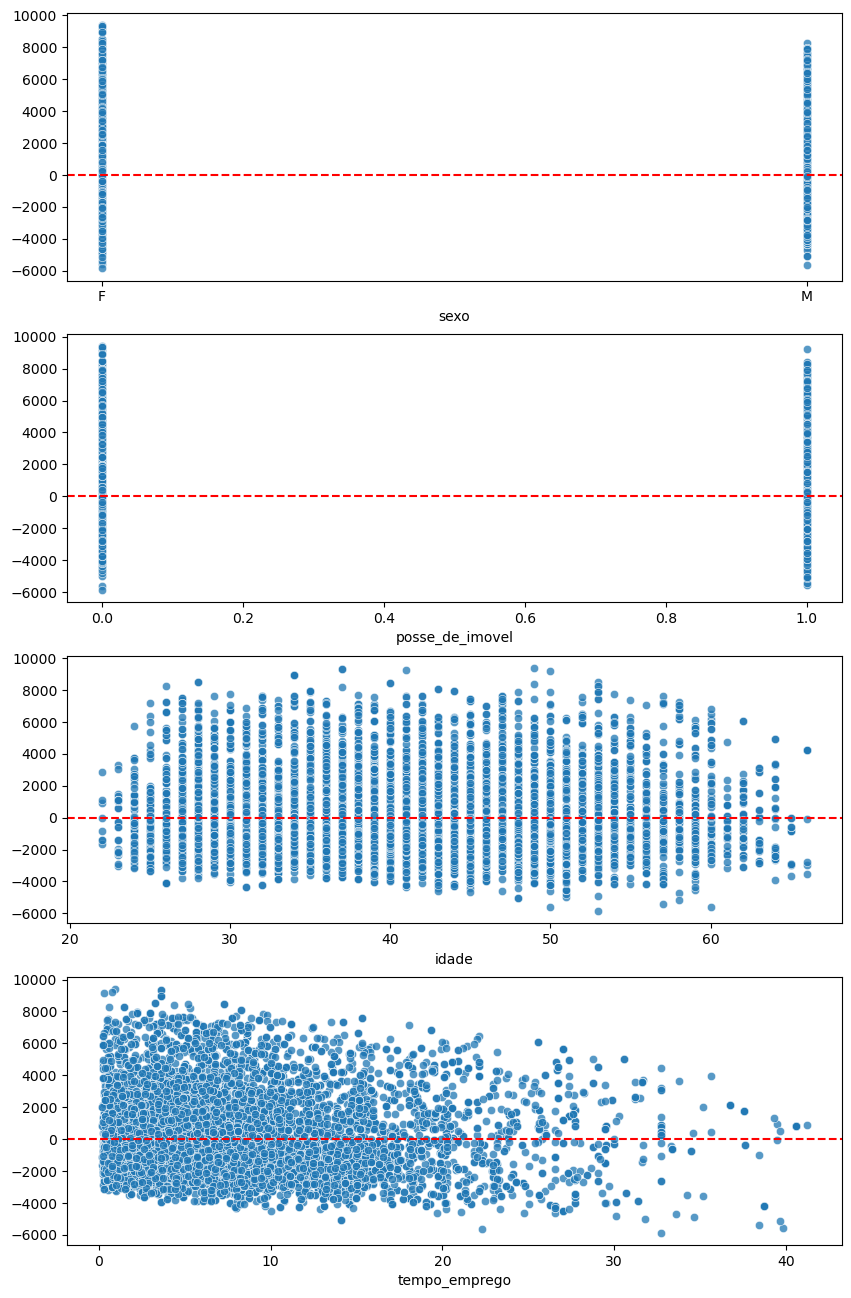

In [42]:
# Criação de subgráficos em uma única coluna (4 subgráficos) com tamanho de figura 10x16
fig, ax = plt.subplots(4, 1, figsize=(10, 16))

# Cálculo dos resíduos do modelo de regressão
res = reg.resid

# Subgráfico 1: Sexo
g1 = sns.scatterplot(ax=ax[0], x='sexo', y=res, data=df, alpha=0.75)
g1.axhline(y=0, color='r', linestyle='--')

# Subgráfico 2: Posse de imóvel
g2 = sns.scatterplot(ax=ax[1], x='posse_de_imovel', y=res, data=df, alpha=0.75)
g2.axhline(y=0, color='r', linestyle='--')

# Subgráfico 3: Idade
g3 = sns.scatterplot(ax=ax[2], x='idade', y=res, data=df, alpha=0.75)
g3.axhline(y=0, color='r', linestyle='--')

# Subgráfico 4: Tempo de emprego
g4 = sns.scatterplot(ax=ax[3], x='tempo_emprego', y=res, data=df, alpha=0.75)
g4.axhline(y=0, color='r', linestyle='--')

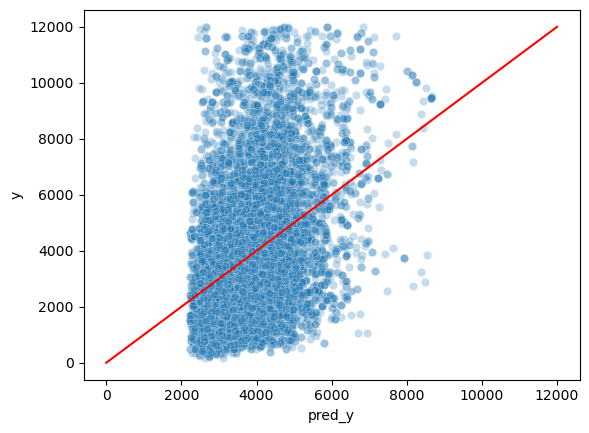

In [43]:
# Obtendo os valores previstos do modelo de regressão
pred_y = reg.fittedvalues

# Obtendo os valores reais (observados) da variável alvo
y = df['renda']

# Criando um DataFrame com os valores reais e previstos
predictions = pd.DataFrame([y, pred_y]).T
predictions.columns = ['y', 'pred_y']

# Criando um gráfico de dispersão entre os valores previstos e reais
sns.scatterplot(x='pred_y', y='y', data=predictions, alpha=.25)

# Adicionando uma linha vermelha representando a igualdade y=x
x = np.linspace(0, 12000, 1000)
plt.plot(x, x, color='r')

In [44]:
# Ajustando um modelo de regressão linear usando a variável categórica 'tipo_renda'
reg = smf.ols("renda ~ C(tipo_renda)", data=df).fit()

# Exibindo o resumo estatístico do modelo
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     52.19
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.05e-43
Time:                        20:45:10   Log-Likelihood:            -1.3026e+05
No. Observations:               14112   AIC:                         2.605e+05
Df Residuals:                   14107   BIC:                         2.606e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          3720.0217     28.769    129.307      0.000    3663.631    3776.413
C(tipo_renda)[T.Bolsista]           860.0408   1234.553      0.697      0.486   -1559.846    3279.928
C(tipo_renda)[T.Empresário]         368.7195     53.032      6.953      0.000     264.770     472.669
C(tipo_renda)[T.Pensionista]       -478.8322     57.268     -8.361      0.000    -591.085    -366.579
C(tipo_renda)[T.Servidor público]   504.3680     77.095      6.542      0.000     353.251     655.485
==============================================================================
Omnibus:                     2058.792   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3077.636
Skew:                           1.087   Prob(JB):                         0.00
Kurtosis:                       3.712   Cond. No.                         62.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""